<h3>Objetivo da análise<p>
Neste projeto será realizada uma análise exploratória de um conjunto de dados de vendas de chocolate, o objetivo desta análise é obter resultados clave, identificar padrões e concluir insights de utilidade.

Biblioteca para tratar dados com dataframe

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
dataset = pd.read_csv('choco.csv')
dataset.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [32]:
dataset.shape

(1094, 6)

In [33]:
dataset.columns = ["Vendedor", "País", "Produto", "Data", "Preço", "Caixas"]
dataset.head()

,Vendedor,País,Produto,Data,Preço,Caixas
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [34]:
dataset.isnull().sum()

Vendedor    0
País        0
Produto     0
Data        0
Preço       0
Caixas      0
dtype: int64

In [35]:
dataset['Preço']=dataset['Preço'].str.replace("$","")
dataset['Preço']

0        5,320 
1        7,896 
2        4,501 
3       12,726 
4       13,685 
         ...   
1089     4,410 
1090     6,559 
1091       574 
1092     2,086 
1093     5,075 
Name: Preço, Length: 1094, dtype: object

In [36]:
dataset['Preço']=dataset['Preço'].str.replace(",","").astype("int")

In [37]:
dataset['Preço']

0        5320
1        7896
2        4501
3       12726
4       13685
        ...  
1089     4410
1090     6559
1091      574
1092     2086
1093     5075
Name: Preço, Length: 1094, dtype: int64

In [38]:
dataset['Data'] = pd.to_datetime(dataset['Data'])

/tmp/ipykernel_20738/1021778646.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Data'] = pd.to_datetime(dataset['Data'])


In [39]:
dataset['Data']

0      2022-01-04
1      2022-08-01
2      2022-07-07
3      2022-04-27
4      2022-02-24
          ...    
1089   2022-05-17
1090   2022-06-07
1091   2022-07-26
1092   2022-07-28
1093   2022-05-23
Name: Data, Length: 1094, dtype: datetime64[ns]

<AxesSubplot: xlabel='País', ylabel='count'>

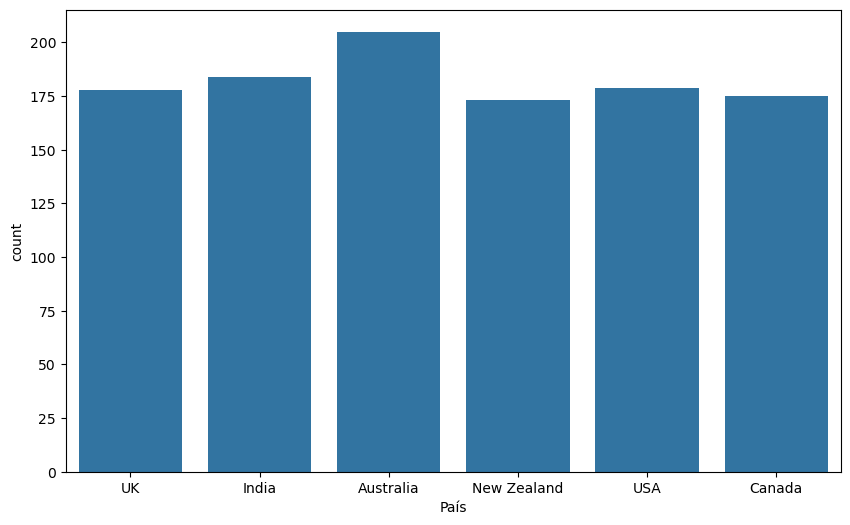

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset,x='País')

In [41]:
dataset.groupby("País")["Caixas"].mean()

País
Australia      159.253659
Canada         178.405714
India          160.163043
New Zealand    153.641618
UK             170.028090
USA            149.854749
Name: Caixas, dtype: float64

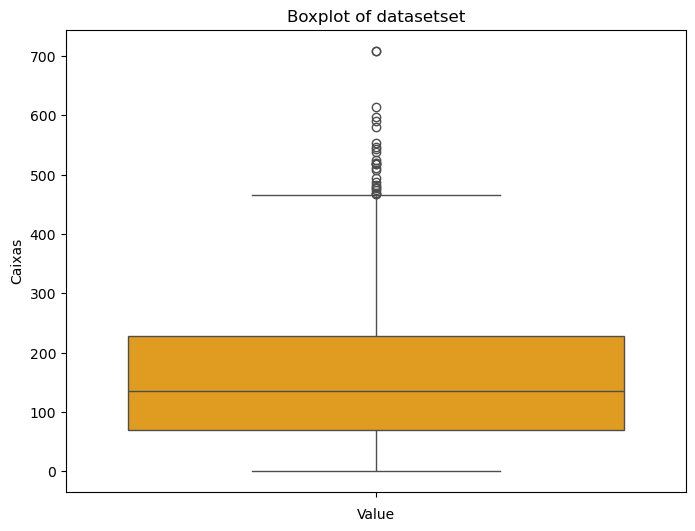

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset['Caixas'], color='orange')
plt.title('Boxplot of datasetset')
plt.xlabel('Value')
plt.show()

In [43]:
total=dataset.groupby('País')['Caixas'].sum()
total=total.reset_index()
total

,País,Caixas
0,Australia,32647
1,Canada,31221
2,India,29470
3,New Zealand,26580
4,UK,30265
5,USA,26824


/tmp/ipykernel_20738/840278334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='País', y='Caixas', data=total, palette='viridis')


<AxesSubplot: xlabel='País', ylabel='Caixas'>

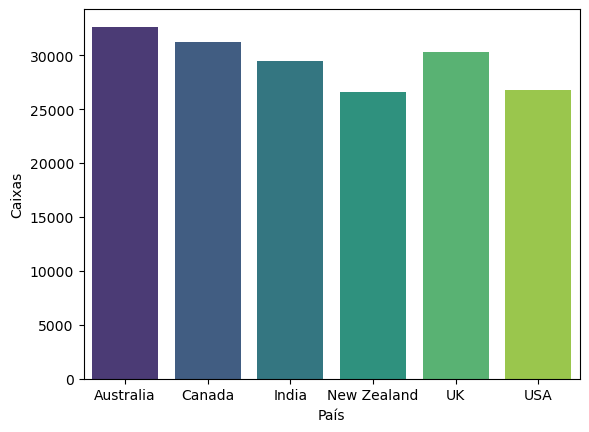

In [44]:
sns.barplot(x='País', y='Caixas', data=total, palette='viridis')

In [45]:
total=dataset.groupby('País')['Preço'].sum().reset_index()
total

,País,Preço
0,Australia,1137367
1,Canada,962899
2,India,1045800
3,New Zealand,950418
4,UK,1051792
5,USA,1035349


In [46]:
dataset.isna().sum()

Vendedor    0
País        0
Produto     0
Data        0
Preço       0
Caixas      0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

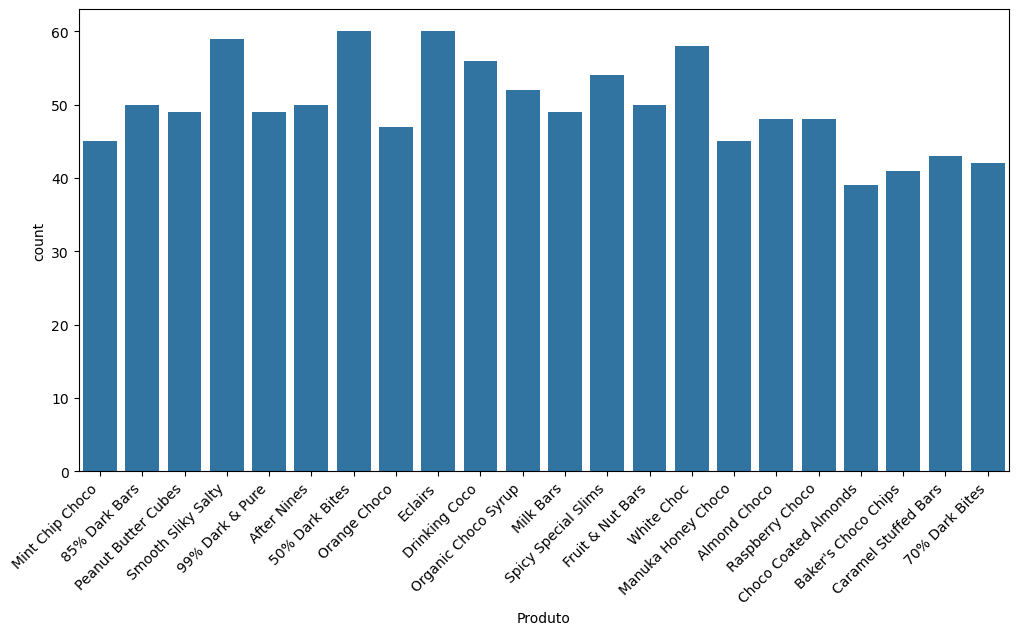

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(data=dataset,x=dataset['Produto'])
plt.xticks(rotation=45, ha='right')
plt.show

In [48]:
agrupar = dataset.groupby(["País"]).size()
agrupar

País
Australia      205
Canada         175
India          184
New Zealand    173
UK             178
USA            179
dtype: int64

<AxesSubplot: xlabel='País'>

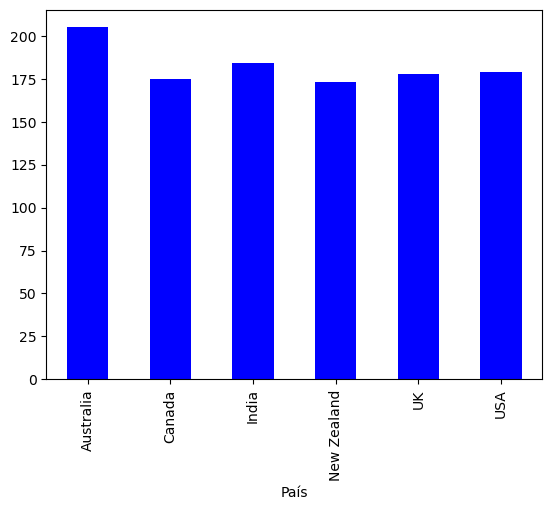

In [49]:
agrupar.plot.bar(color="blue")

In [50]:
info = dataset.describe()
info


,Data,Preço,Caixas
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


Text(0.5, 1.0, 'País')

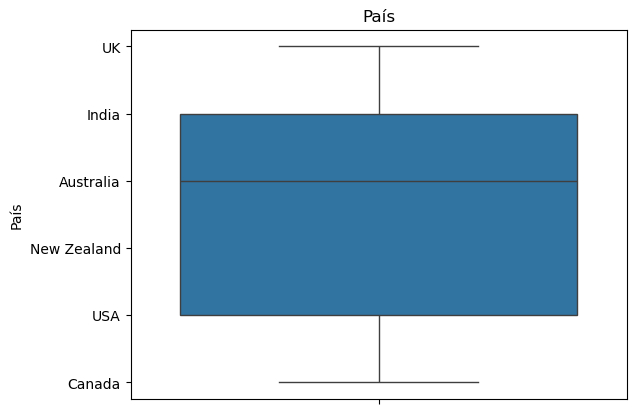

In [51]:
sns.boxplot(dataset["País"]).set_title("País")

In [52]:
agrupar = dataset.groupby(["Preço"]).size()
agrupar

Preço
7        2
28       1
49       2
63       3
70       2
        ..
19327    1
19453    1
19481    1
19929    1
22050    1
Length: 827, dtype: int64

In [53]:
vendas_pais = dataset.groupby('País')['Preço'].sum().sort_values(ascending=False)
vendas_pais

País
Australia      1137367
UK             1051792
India          1045800
USA            1035349
Canada          962899
New Zealand     950418
Name: Preço, dtype: int64

<AxesSubplot: xlabel='Preço', ylabel='Count'>

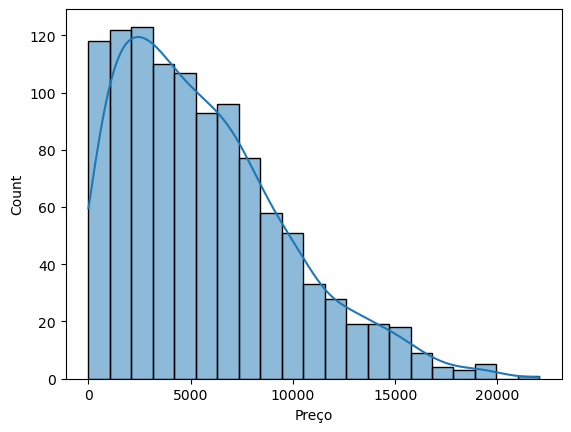

In [54]:
sns.histplot(dataset["Preço"], kde=True)

Preços estão como objeto, melhor converter eles para números para realizar as opeações

In [55]:
dataset.dtypes



Vendedor            object
País                object
Produto             object
Data        datetime64[ns]
Preço                int64
Caixas               int64
dtype: object

In [56]:
dataset.sample(15)

,Vendedor,País,Produto,Data,Preço,Caixas
688,Gunar Cockshoot,UK,50% Dark Bites,2022-01-13,2107,121
309,Dotty Strutley,USA,Orange Choco,2022-02-23,1379,107
880,Dotty Strutley,UK,Mint Chip Choco,2022-07-14,2443,216
104,Brien Boise,Canada,Spicy Special Slims,2022-03-04,8106,101
586,Ches Bonnell,Canada,Choco Coated Almonds,2022-08-24,15547,269
665,Andria Kimpton,Canada,Manuka Honey Choco,2022-07-21,4858,488
855,Brien Boise,USA,70% Dark Bites,2022-04-14,1694,21
872,Madelene Upcott,New Zealand,Mint Chip Choco,2022-03-11,7413,4
106,Husein Augar,UK,Spicy Special Slims,2022-08-25,4697,42
165,Marney O'Breen,UK,Caramel Stuffed Bars,2022-07-19,3549,112


In [57]:
info_vendas  = dataset.describe()
categoria_info = dataset.describe(include='object')
info_vendas

,Data,Preço,Caixas
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


O preço de venda é: $ 5652.308044

A venda mínima foi de: $ 7

A venda máxima foi de: $ 22050.000000

O aviso de caixa enviado por venda é: 161.797989

O mínimo de caixas enviadas foi: 1

O máximo de caixas enviadas foi: 709.000000

In [58]:
venda_pais = dataset.groupby('País')['Preço'].sum()
venda_pais

País
Australia      1137367
Canada          962899
India          1045800
New Zealand     950418
UK             1051792
USA            1035349
Name: Preço, dtype: int64